In [123]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [92]:
df=pd.read_csv('heart.csv')


In [84]:
# pick categorical data
df_categorical=[i for i in df.columns if df.dtypes[i]=='object']

# # pick integer and float data
# df_numerical=[i for i in df.columns if df.dtypes[i]=='int64' or df.dtypes[i]=='float64']
# df_categorical

In [85]:
# get_dumies for one hot encoding
encoded_df=pd.get_dummies(df,columns=df_categorical)

In [97]:
# min max sacaling 

min_max_scaler=MinMaxScaler()
min_max_scaled_data=min_max_scaler.fit_transform(encoded_df)

scaled_df = pd.DataFrame(min_max_scaled_data, columns=encoded_df.columns)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<Axes: >

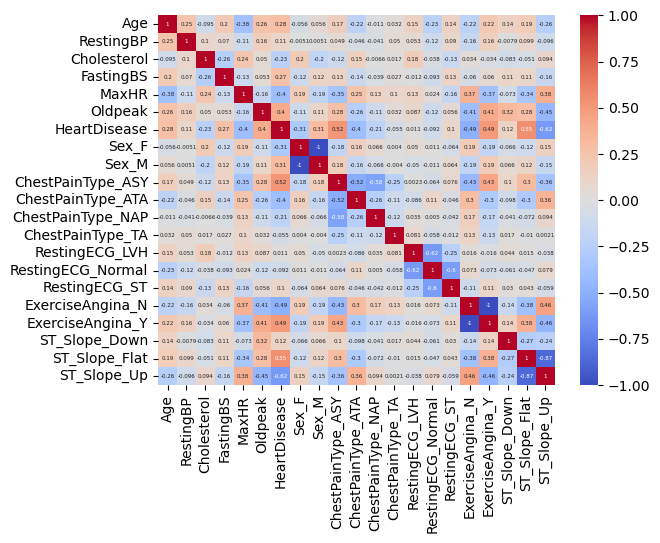

In [104]:
# heat map
corr_matrix=scaled_df.corr()
sns.heatmap(data=corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,annot_kws={"fontsize":4})

In [111]:
x=scaled_df.drop('HeartDisease',axis=1)
y=scaled_df['HeartDisease']

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)
# Logistic regresion model 
log_object=LogisticRegression()
log_object.fit(X_train,y_train)
y_prediction=log_object.predict(X_test)
accuracy=accuracy_score(y_test,y_prediction)
print('Logistic regretion model Accuracy:',accuracy)

confuction_matrix=confusion_matrix(y_test,y_prediction)
print(f'Confution Matrix is:\n{confuction_matrix} ')

Logistic regretion model Accuracy: 0.8462585034013606
Confution Matrix is:
[[274  45]
 [ 68 348]] 


In [120]:
# Random Forest Classifier
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)

rf_classifier.fit(X_train,y_train)
yrf_predict=rf_classifier.predict(X_test)
rf_accuracy=accuracy_score(y_test,yrf_predict)
print(f'Random forest model Acuuracy: ',rf_accuracy)

# confution matrix 
rf_confution_matrix=confusion_matrix(y_test,yrf_predict)
print(f'Random Forest model Confution matrix: \n{rf_confution_matrix}')
# clasification report is used to more accuracy
print(classification_report(y_test,yrf_predict))

Random forest model Acuuracy:  0.8598639455782313
Random Forest model Confution matrix: 
[[282  37]
 [ 66 350]]
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85       319
         1.0       0.90      0.84      0.87       416

    accuracy                           0.86       735
   macro avg       0.86      0.86      0.86       735
weighted avg       0.86      0.86      0.86       735



In [133]:
# XGB classifier
xgb_classifier=XGBClassifier(n_estimator=100,learning_rate=0.2,max_depth=3,random_state=42)
xgb_classifier.fit(X_train,y_train)
xgb_predict=xgb_classifier.predict(X_test)
print('Clssification report: ',classification_report(y_test,xgb_predict))

c:\Users\avish\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:07:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


Clssification report:                precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       319
         1.0       0.89      0.85      0.87       416

    accuracy                           0.86       735
   macro avg       0.85      0.86      0.85       735
weighted avg       0.86      0.86      0.86       735

